In [1]:
%matplotlib nbagg  
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation

The below code is to demonstrate simple plane polarizations, of electromagnetic waves, travelling in the Z-direction, in vacuum. Here we see the effects of varying frequency, amplitude, and most importantly, phase difference between X and Y components of electric field.

<IPython.core.display.Javascript object>


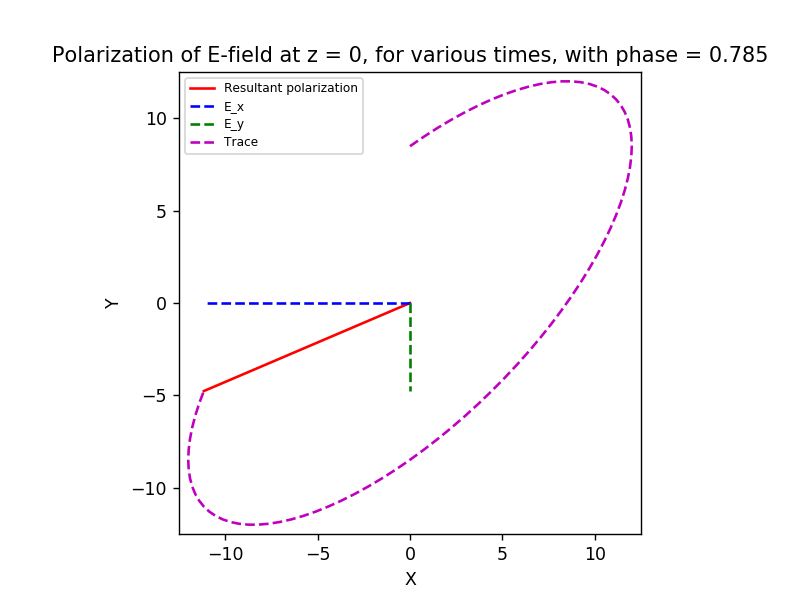

In [30]:
fig, ax = plt.subplots()

#initialize the parameter you are going to change in the animation
t = [0.0]


#CHANGE THESE PARAMETERS AS NECESSARY
w = 2*np.pi*1 #Frequency (in radian)
o = np.pi/4 #Phase difference between X and Y components of Electric Field
E0 = 12 #Amplitude of Electric field


#Setting up the arms
line, = ax.plot((0,0), (E0*np.sin(w*t[0]),E0* np.sin(w*t[0] + o)), 'r-', label = "Resultant polarization")
x, = ax.plot((0,0), (E0*np.sin(w*t[0]), 0), 'b--', label = "E_x")
y, = ax.plot((0,0), (0, E0*np.sin(w*t[0] + o)), 'g--', label = "E_y")
trace, = ax.plot(E0*np.sin(w*t[0]), E0*np.sin(w*t[0] + o), 'm--', label = "Trace")

#Set up the plot
ax.set_aspect('equal')
ax.legend(fontsize = 7)
ax.set_xlim(-(0.5 + E0), (0.5 + E0))
ax.set_ylim(-(0.5 + E0), (0.5 + E0))
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Polarization of E-field at z = 0, for various times, with phase = '+ str(round(o, 3)))

#No. of points to remember for the trace
remember = 100


#Initialize the animation function by setting initial position for everything
def init():
    line.set_xdata([0.0, E0*np.sin(w*t[-1])])
    line.set_ydata([0.0, E0*np.sin(w*t[-1] + o)])
    x.set_xdata([0.0, E0*np.sin(w*t[-1])])
    x.set_ydata([0.0, 0.0])
    y.set_xdata([0.0, 0.0])
    y.set_ydata([0.0, E0*np.sin(w*t[-1] + o)])
    trace.set_xdata(E0*np.sin(w*t[-1]))
    trace.set_ydata(E0*np.sin(w*t[-1] + o))
    return line, x, y, trace,


#the animate function
def animate(i):
    t.append(i/100)
    rect = t[-remember:]
    line.set_xdata([0.0, E0*np.sin(w*t[-1])])
    line.set_ydata([0.0, E0*np.sin(w*t[-1] + o)])
    x.set_xdata([0.0, E0*np.sin(w*t[-1])])
    x.set_ydata([0.0, 0.0])
    y.set_xdata([0.0, 0.0])
    y.set_ydata([0.0, E0*np.sin(w*t[-1] + o)])
    trace.set_xdata([E0*np.sin(w*rect[j]) for j in range(len(rect))])
    trace.set_ydata([E0*np.sin(w*rect[j] + o) for j in range(len(rect))])
    return line, x, y, trace,

#interval is ms delay between frames
#blit makes sure it doesn't start over everytime
ani = animation.FuncAnimation( fig, animate, init_func=init, interval=100, frames = 250, blit=True )
plt.show()

In [26]:
#ani.save("Polarization.mp4")

In [29]:
plt.close()